<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/datamining/global-data-on-sustainable-energy (1).csv')
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [30]:
print(data.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


# Data Cleaning

In [48]:
# Assuming your DataFrame is named 'data'
unique_countries = data['Entity'].unique()

# Print the list of unique countries without repetitions
for country in unique_countries:
    print(country)


Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
French Guiana
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nauru
Nepal
Netherlands
New 

In [31]:
data.fillna(0, inplace=True)


In [49]:
import pandas as pd
import plotly.express as px


# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)].copy()  # Make a copy of the filtered DataFrame

# Remove the newline character from the column name
filtered_data.rename(columns=lambda x: x.replace('\n', '_'), inplace=True)

# Create a scatter plot using Plotly Express with facetting by 'Entity'
fig = px.scatter(filtered_data, x='Access to electricity (% of population)', y='Value_co2_emissions_kt_by_country',
                 title='Carbon Emission vs Energy Access Classification',
                 labels={'Access to electricity (% of population)': 'Access to Electricity (%)', 'Value_co2_emissions_kt_by_country': 'Carbon Emission (metric tons per capita)'},
                 marginal_y='box',  # This adds a box plot to the y-axis
                 color='Access to electricity (% of population)',  # Color points by energy access
                 facet_col='Entity',  # Create separate plots for each country
                 facet_col_wrap=3,  # Number of columns in the facet grid
                 width=1200,  # Adjust the width of the entire plot
                 height=800,  # Adjust the height of the entire plot
                 )

# Customize the appearance of the plot
fig.update_traces(marker=dict(size=4))  # Adjust marker size

# Update the layout for better visualization
fig.update_layout(
    legend_title='Access to Electricity (%)',  # Set the legend title
    showlegend=True,
    legend=dict(x=0.02, y=1),
    autosize=True,
)

# Show the plot
fig.show()


In [50]:
import plotly.express as px

# List of countries to include
countries_to_include = ['Brunei Darussalam', 'Burma', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)]

# Create the strip plot
fig = px.strip(filtered_data, x='Access to electricity (% of population)', y='Value_co2_emissions_kt_by_country',
               color='Entity',
               title='Carbon Emission vs Energy Access Classification for Selected Countries',
               labels={'Access to electricity (% of population)': 'Access to Electricity (%)', 'Value_co2_emissions_kt_by_country': 'Carbon Emission (metric tons per capita)'})

fig.show()


        Entity     level_1  Correlation Coefficient
0     Cambodia  gdp_growth                 0.032511
1    Indonesia  gdp_growth                 0.266550
2     Malaysia  gdp_growth                 0.313436
3      Myanmar  gdp_growth                 0.055783
4  Philippines  gdp_growth                 0.299185
5    Singapore  gdp_growth                      NaN
6     Thailand  gdp_growth                -0.047856


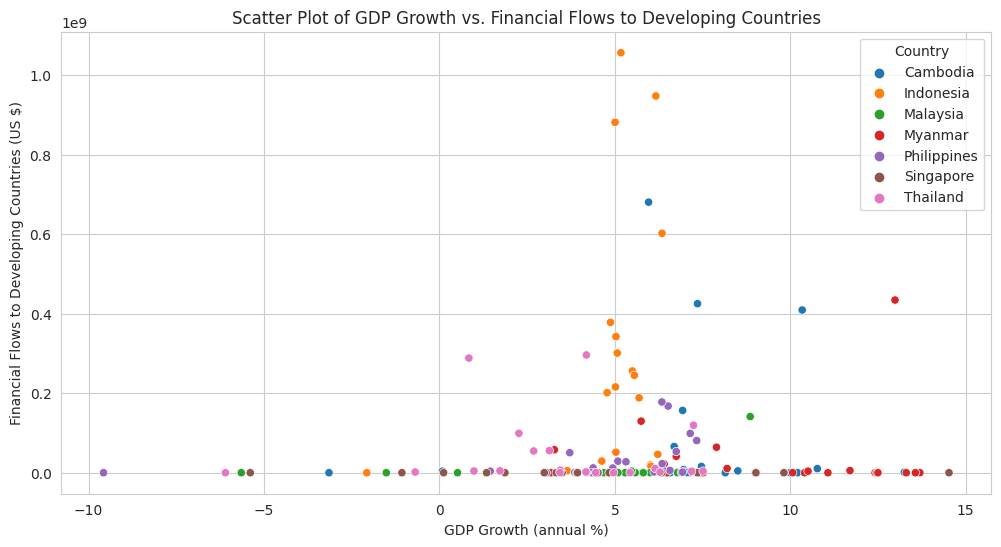

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)].copy()  # Make a copy of the filtered DataFrame

# Scatter plot of GDP growth vs. Financial flows to developing countries
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='gdp_growth', y='Financial flows to developing countries (US $)', hue='Entity')
plt.title('Scatter Plot of GDP Growth vs. Financial Flows to Developing Countries')
plt.xlabel('GDP Growth (annual %)')
plt.ylabel('Financial Flows to Developing Countries (US $)')
plt.legend(title='Country')
plt.grid(True)

# Calculate correlation coefficients
correlation_coefficient = filtered_data.groupby('Entity')[['gdp_growth', 'Financial flows to developing countries (US $)']].corr().iloc[0::2,-1].reset_index()
correlation_coefficient.rename(columns={'Financial flows to developing countries (US $)': 'Correlation Coefficient'}, inplace=True)

# Display the correlation coefficients
print(correlation_coefficient)
plt.show()


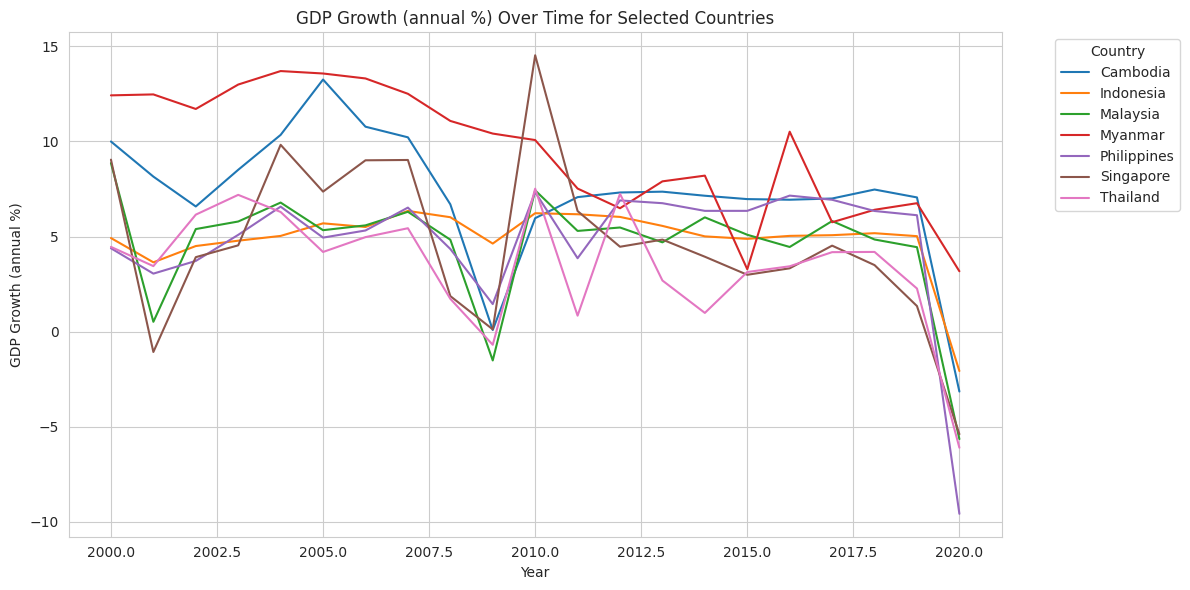

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)].copy()  # Make a copy of the filtered DataFrame

# Set the style for the plot
sns.set_style("whitegrid")

# Create a line plot for each country
plt.figure(figsize=(12, 6))
for country in countries_to_include:
    country_data = filtered_data[filtered_data['Entity'] == country]
    sns.lineplot(data=country_data, x='Year', y='gdp_growth', label=country)

# Customize the plot
plt.title('GDP Growth (annual %) Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


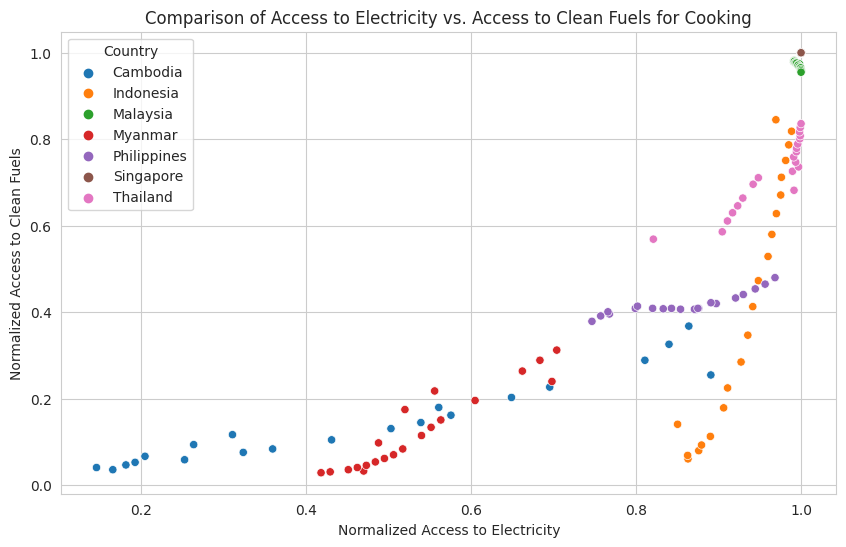

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)].copy()  # Make a copy of the filtered DataFrame

# Select the columns of interest
columns_of_interest = ['Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking']

# Normalize the data for both columns
filtered_data['Normalized Access to Electricity'] = filtered_data['Access to electricity (% of population)'] / 100.0  # Normalize to [0, 1]
filtered_data['Normalized Access to Clean Fuels'] = filtered_data['Access to clean fuels for cooking'] / 100.0  # Normalize to [0, 1]

# Create a scatter plot to compare the normalized data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Normalized Access to Electricity', y='Normalized Access to Clean Fuels', hue='Entity')
plt.title('Comparison of Access to Electricity vs. Access to Clean Fuels for Cooking')
plt.xlabel('Normalized Access to Electricity')
plt.ylabel('Normalized Access to Clean Fuels')
plt.grid(True)
plt.legend(title='Country')
plt.show()


<Figure size 1200x600 with 0 Axes>

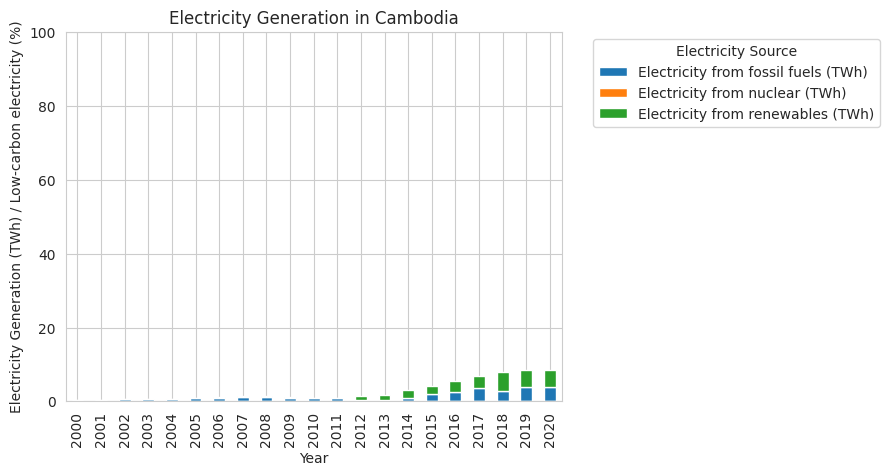

<Figure size 1200x600 with 0 Axes>

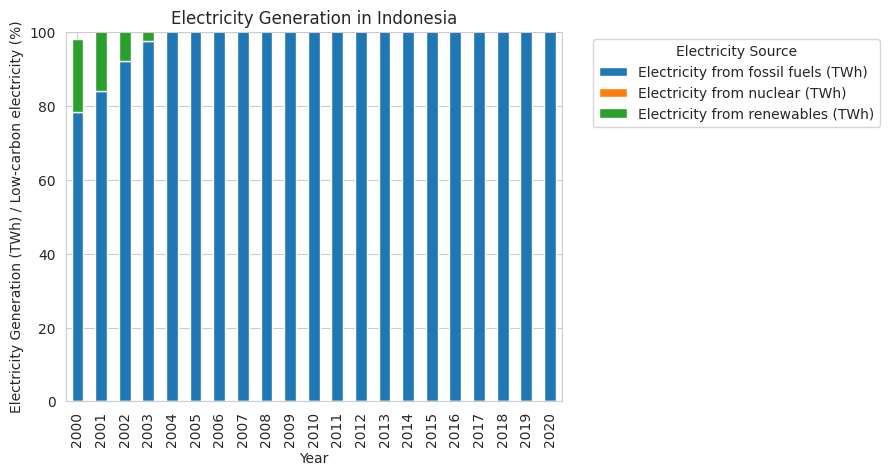

<Figure size 1200x600 with 0 Axes>

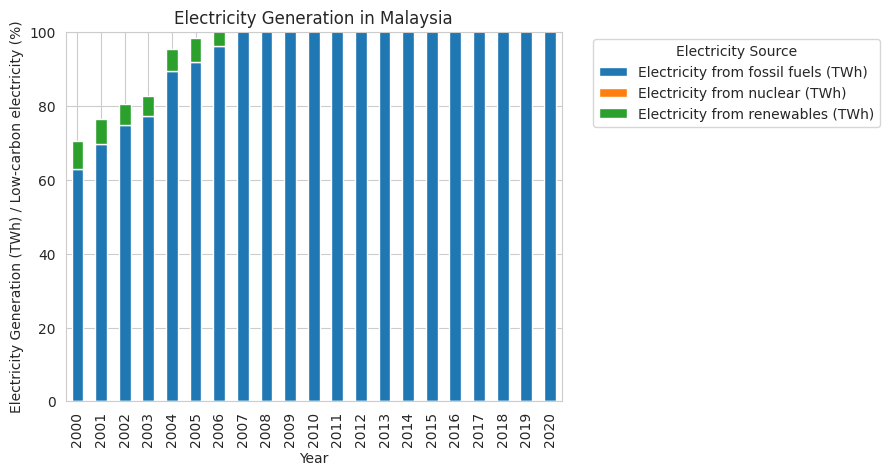

<Figure size 1200x600 with 0 Axes>

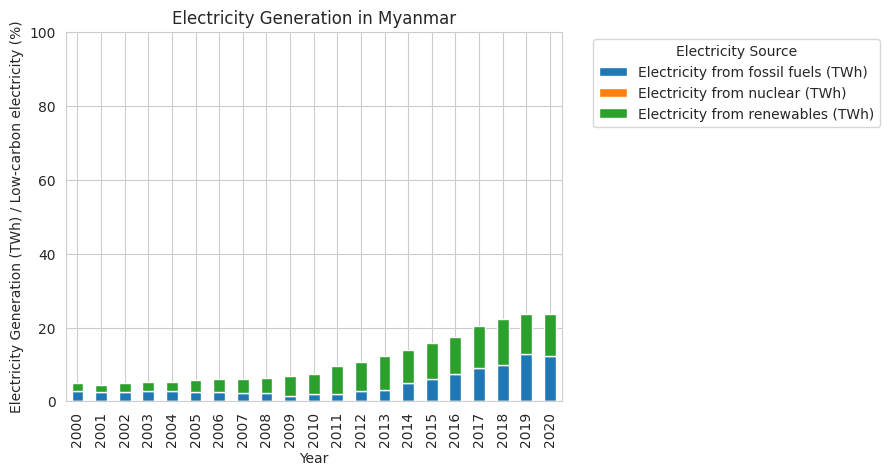

<Figure size 1200x600 with 0 Axes>

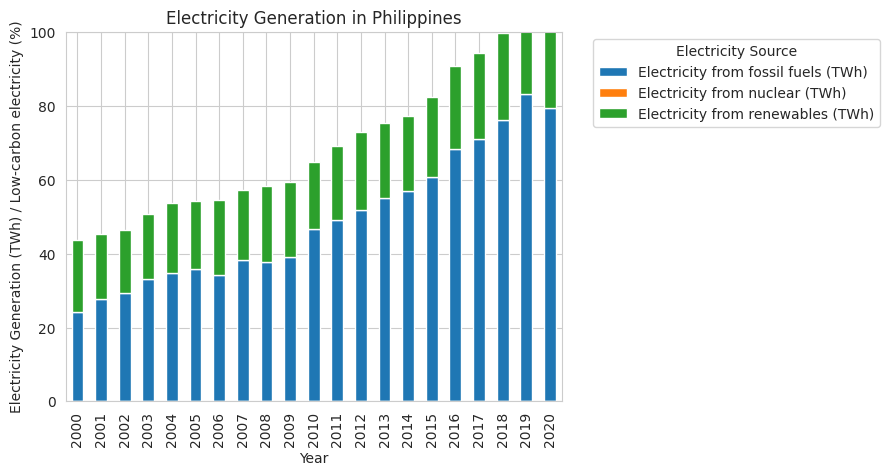

<Figure size 1200x600 with 0 Axes>

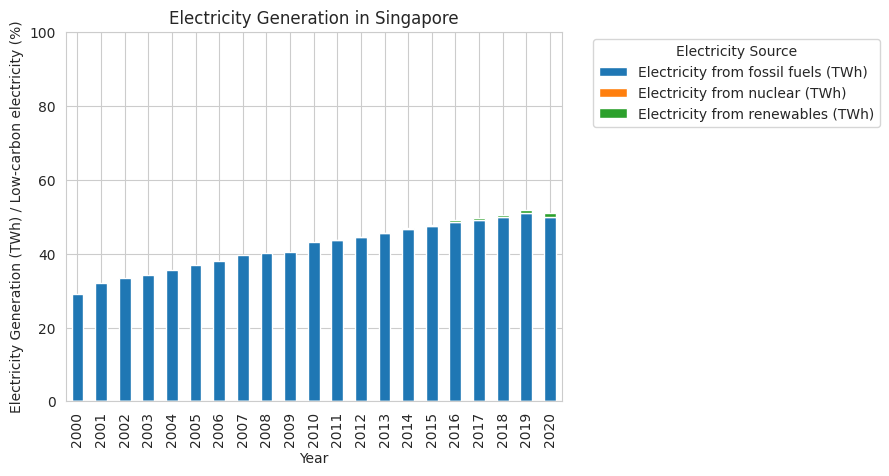

<Figure size 1200x600 with 0 Axes>

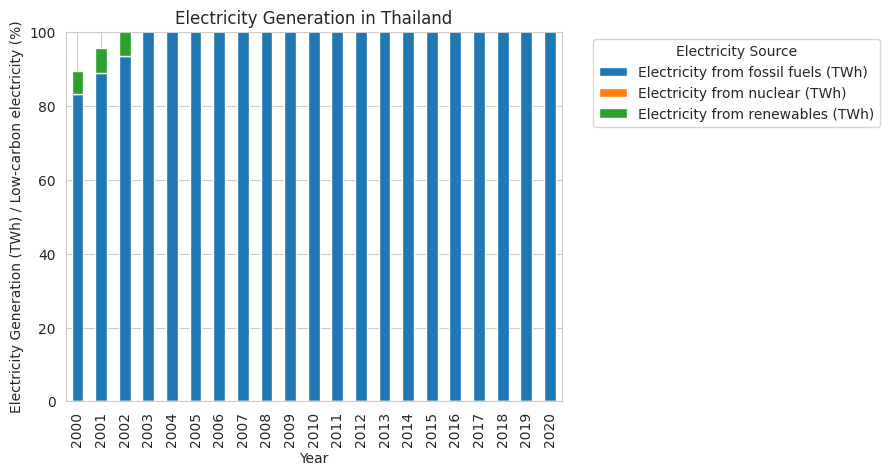

In [55]:
# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Filter the data for the specified countries
filtered_data = data[data['Entity'].isin(countries_to_include)].copy()  # Make a copy of the filtered DataFrame

# Select the columns of interest
columns_of_interest = ['Year', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)']

# Set the range for 'Low-carbon electricity (% electricity)' to be in [0, 100]
filtered_data['Low-carbon electricity (% electricity)'] *= 100.0

# Iterate through the list of countries and create separate bar graphs for each
for country in countries_to_include:
    country_data = filtered_data[filtered_data['Entity'] == country]

    # Check if the country_data DataFrame is not empty
    if not country_data.empty:
        plt.figure(figsize=(12, 6))
        ax = country_data.plot(x='Year', y=columns_of_interest[1:], kind='bar', stacked=True)
        plt.title(f'Electricity Generation in {country}')
        plt.xlabel('Year')
        plt.ylabel('Electricity Generation (TWh) / Low-carbon electricity (%)')
        plt.ylim(0, 100)  # Set the y-axis range to [0, 100]

        # Move the legend outside of the graph
        ax.legend(title='Electricity Source', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.show()


In [12]:
print(data.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


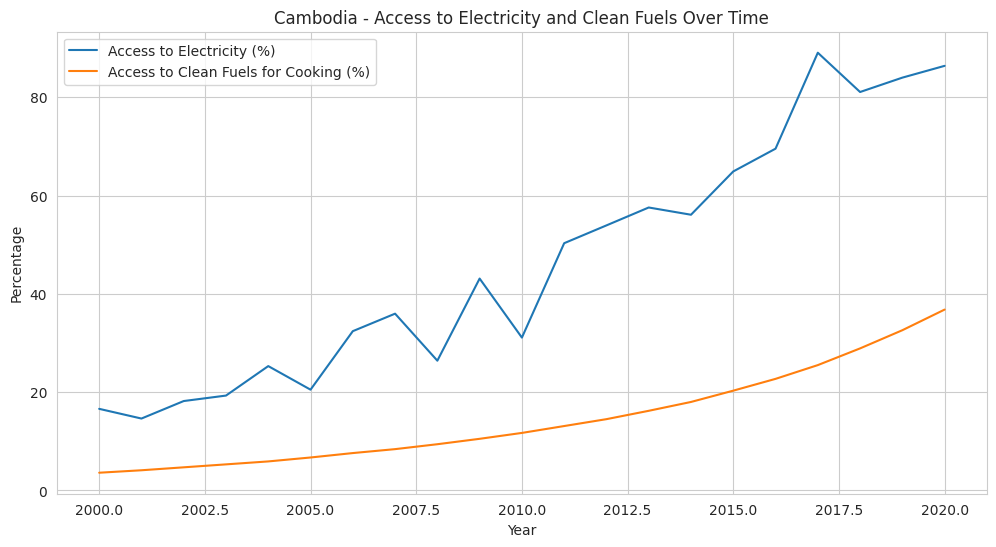

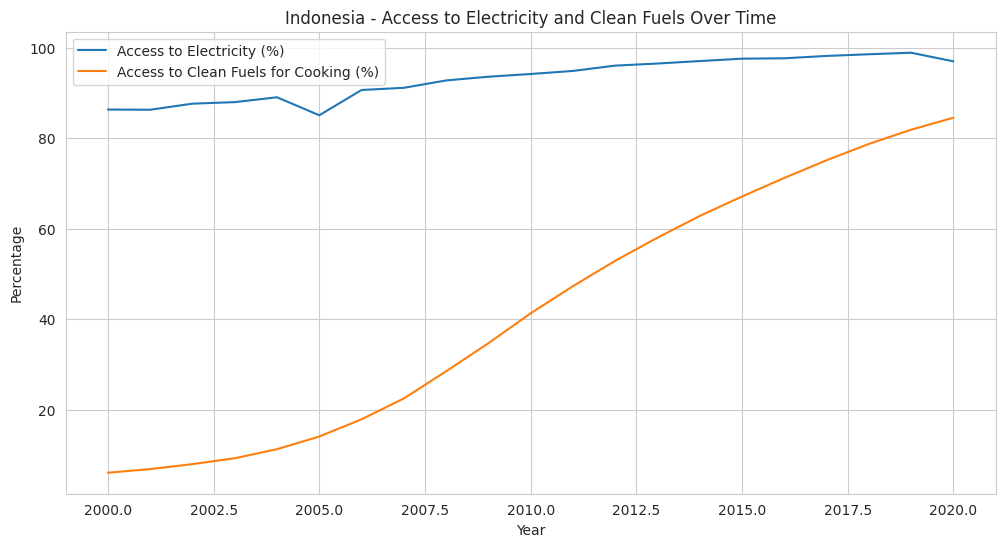

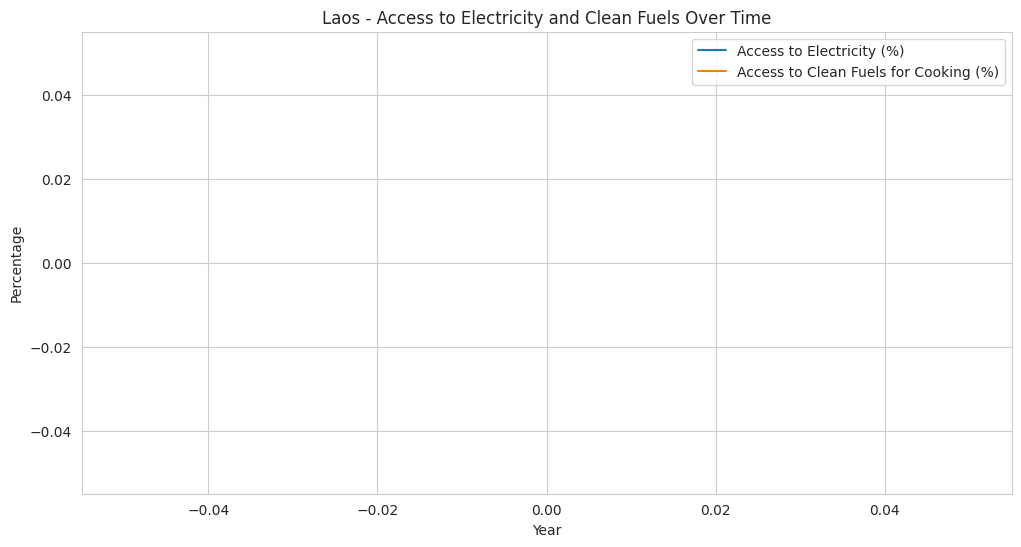

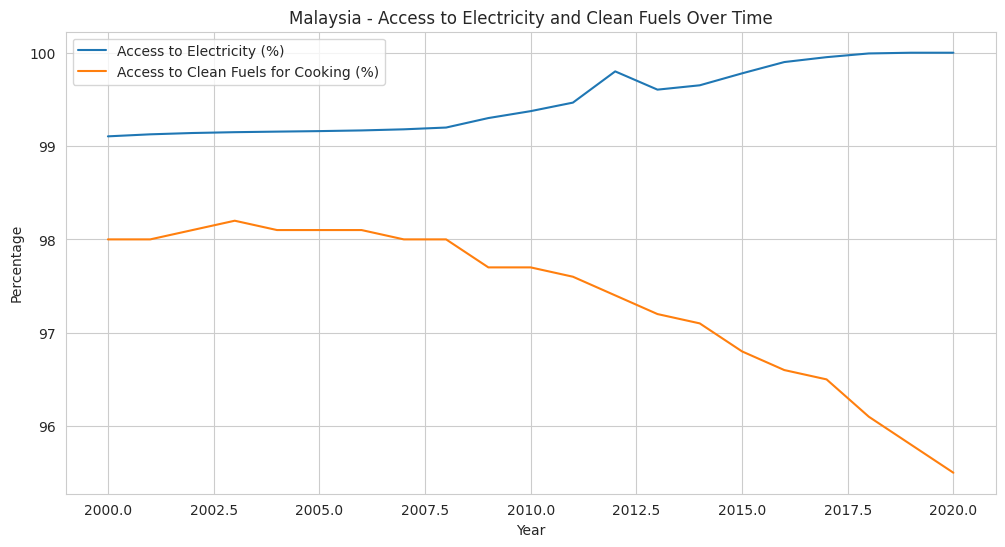

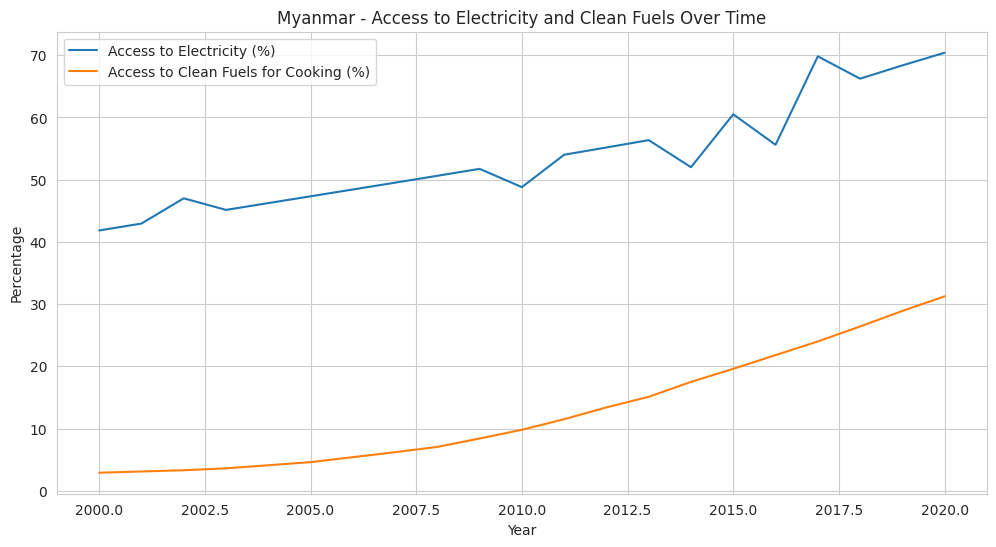

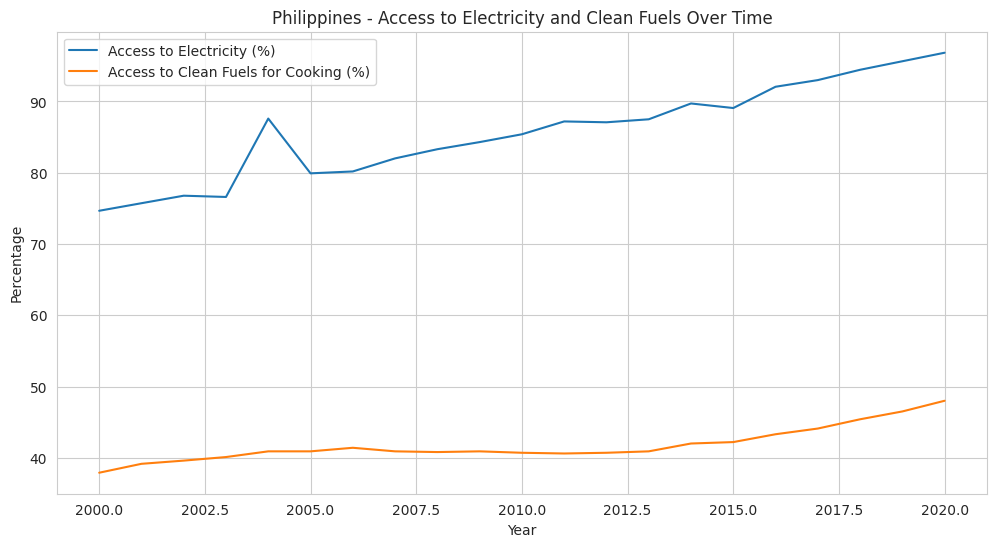

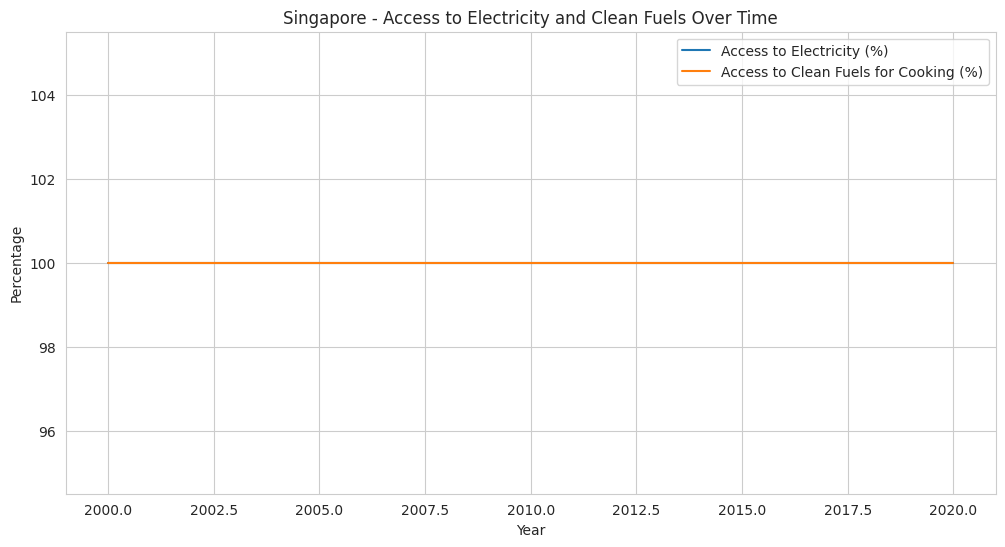

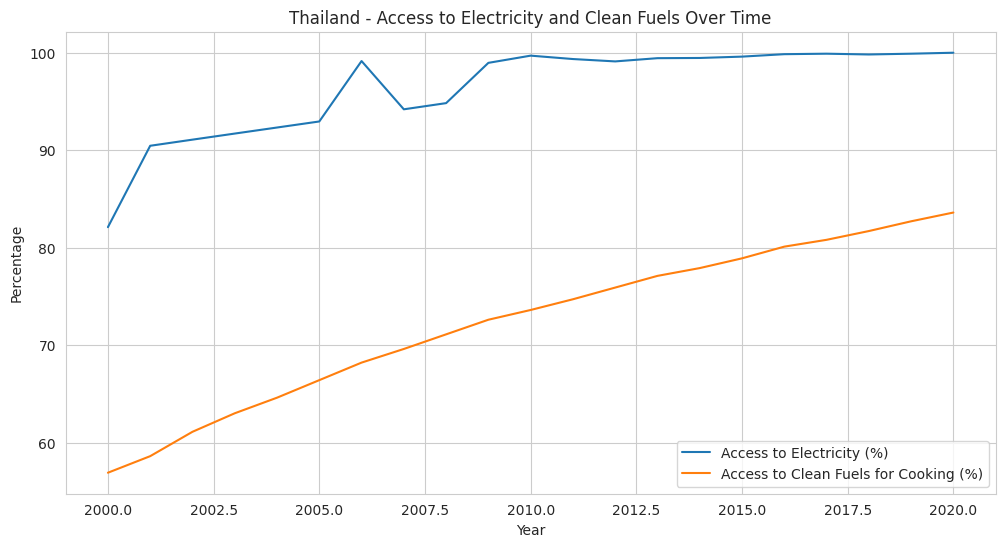

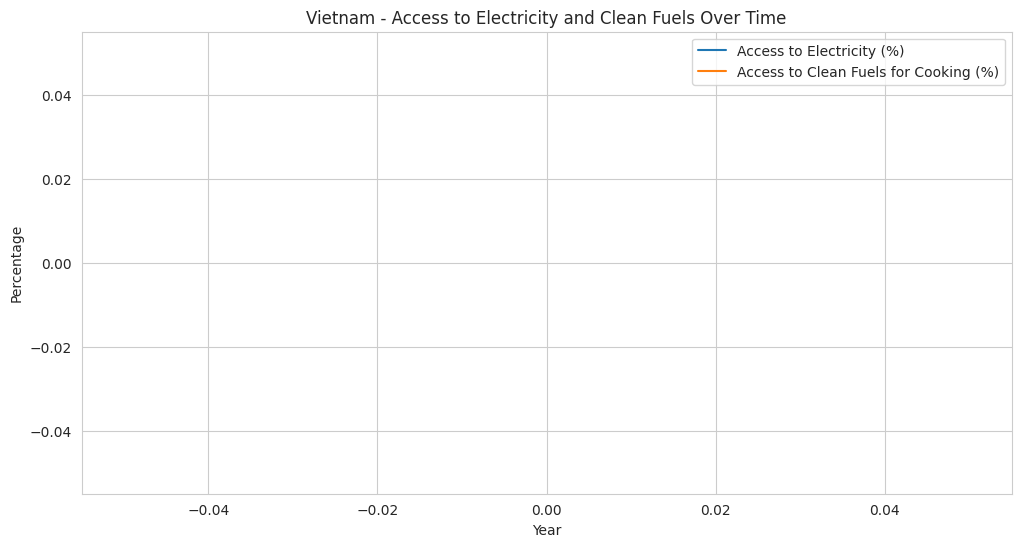

In [56]:
data = pd.read_csv('/content/drive/MyDrive/datamining/global-data-on-sustainable-energy (1).csv')

# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Iterate through the list of countries and create a line graph for each
for country in countries_to_include:
    # Filter the data for the specified country
    country_data = data[data['Entity'] == country]

    # Select the columns of interest for the line graph
    columns_of_interest = ['Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking']

    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Year'], country_data[columns_of_interest[1]], label='Access to Electricity (%)')
    plt.plot(country_data['Year'], country_data[columns_of_interest[2]], label='Access to Clean Fuels for Cooking (%)')
    plt.title(f'{country} - Access to Electricity and Clean Fuels Over Time')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()


In [17]:
print(data.columns)


Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


# Data Cleaning

In [41]:
has_nan = data.isna().any().any()

if has_nan:
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain NaN values.")

The dataset contains NaN values.


In [58]:
data.fillna(0, inplace=True)

In [59]:
has_nan = data.isna().any().any()

if has_nan:
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain NaN values.")

The dataset does not contain NaN values.


# Prediction

<ipython-input-67-34659dacf9f2>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-67-34659dacf9f2>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-67-34659dacf9f2>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-67-34659dacf9f2>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-67-34659dacf9f2>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-67-34659dacf9f2>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

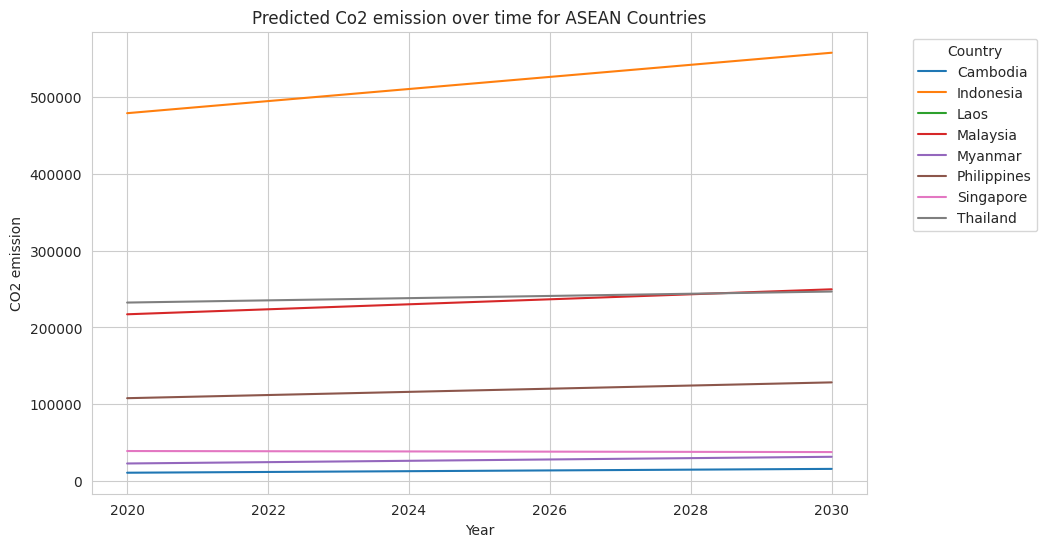

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your dataset (assuming it has columns like 'Entity', 'Year', and 'gdp_growth')

# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand']

# Create an empty DataFrame to store predicted data
predicted_data = pd.DataFrame(columns=['Entity', 'Year', 'Predicted Growth'])

# Create a linear regression model
model = LinearRegression()

# Iterate through the list of countries
for country in countries_to_include:
    # Filter the data for the current country
    country_data = data[(data['Entity'] == country) & (data['Year'] <= 2020)]

    if not country_data.empty:
        # Prepare data for training
        X_train = country_data[['Year']]
        y_train = country_data['Value_co2_emissions_kt_by_country']

        # Train the model
        model.fit(X_train, y_train)

        # Predict GDP growth for future years (2020+)
        years_to_predict = [2020, 2021, 2022, 2023, 2024, 2025,2026,2027,2028,2029,2030]  # Add more years as needed
        X_future = pd.DataFrame({'Year': years_to_predict})
        predicted_growth = model.predict(X_future)

        # Create a DataFrame for the current country's predicted data
        predicted_country_data = pd.DataFrame({'Entity': [country] * len(years_to_predict),
                                               'Year': years_to_predict,
                                               'Predicted Growth': predicted_growth})

        # Append the predicted data to the overall DataFrame
        predicted_data = predicted_data.append(predicted_country_data, ignore_index=True)

# Visualize the predicted GDP growth for the selected countries
plt.figure(figsize=(10, 6))
for country in countries_to_include:
    country_predicted_data = predicted_data[predicted_data['Entity'] == country]
    plt.plot(country_predicted_data['Year'], country_predicted_data['Predicted Growth'], label=country)

plt.title('Predicted Co2 emission over time for ASEAN Countries')
plt.xlabel('Year')
plt.ylabel('CO2 emission')

# Move the legend outside of the graph
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()


<ipython-input-82-640ec3508980>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-82-640ec3508980>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-82-640ec3508980>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-82-640ec3508980>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-82-640ec3508980>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-82-640ec3508980>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

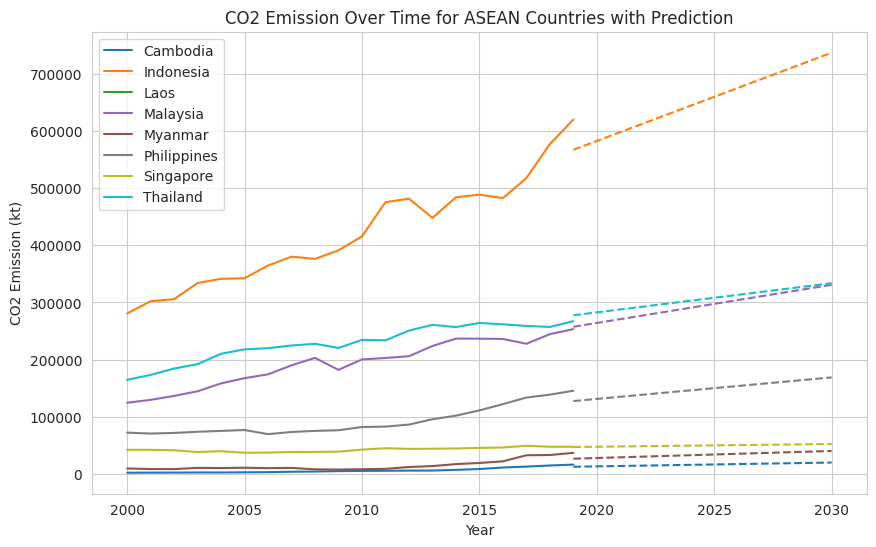

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your dataset (assuming it has columns like 'Entity', 'Year', and 'gdp_growth')

# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand']

# Create an empty DataFrame to store predicted data
predicted_data = pd.DataFrame(columns=['Entity', 'Year', 'Predicted Growth'])

# Create a linear regression model
model = LinearRegression()

# Iterate through the list of countries
for country in countries_to_include:
    # Filter the data for the current country
    country_data = data[(data['Entity'] == country) & (data['Year'] <= 2019)]

    if not country_data.empty:
        # Prepare data for training
        X_train = country_data[['Year']]
        y_train = country_data['Value_co2_emissions_kt_by_country']

        # Train the model
        model.fit(X_train, y_train)

        # Predict GDP growth for future years (2020+)
        years_to_predict = [2019, 2020, 2021, 2022, 2023, 2024, 2025,2026,2027,2028,2029,2030]  # Add more years as needed
        X_future = pd.DataFrame({'Year': years_to_predict})
        predicted_growth = model.predict(X_future)

        # Create a DataFrame for the current country's predicted data
        predicted_country_data = pd.DataFrame({'Entity': [country] * len(years_to_predict),
                                               'Year': years_to_predict,
                                               'Predicted Growth': predicted_growth})

        # Append the predicted data to the overall DataFrame
        predicted_data = predicted_data.append(predicted_country_data, ignore_index=True)

# Visualize the predicted GDP growth for the selected countries
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(countries_to_include))

for idx, country in enumerate(countries_to_include):
    country_data = data[(data['Entity'] == country) & (data['Year'] <= 2019)]
    country_predicted_data = predicted_data[predicted_data['Entity'] == country]

    # Plot both historical and predicted data using the same color
    color = colors(idx)
    plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label=f'{country}', linestyle='-', color=color)
    plt.plot(country_predicted_data['Year'], country_predicted_data['Predicted Growth'], linestyle='--', color=color)

plt.title('CO2 Emission Over Time for ASEAN Countries with Prediction')
plt.xlabel('Year')
plt.ylabel('CO2 Emission (kt)')
plt.legend()
plt.grid(True)
plt.show()




<ipython-input-81-58dca8b054c5>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-81-58dca8b054c5>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-81-58dca8b054c5>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-81-58dca8b054c5>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-81-58dca8b054c5>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-81-58dca8b054c5>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

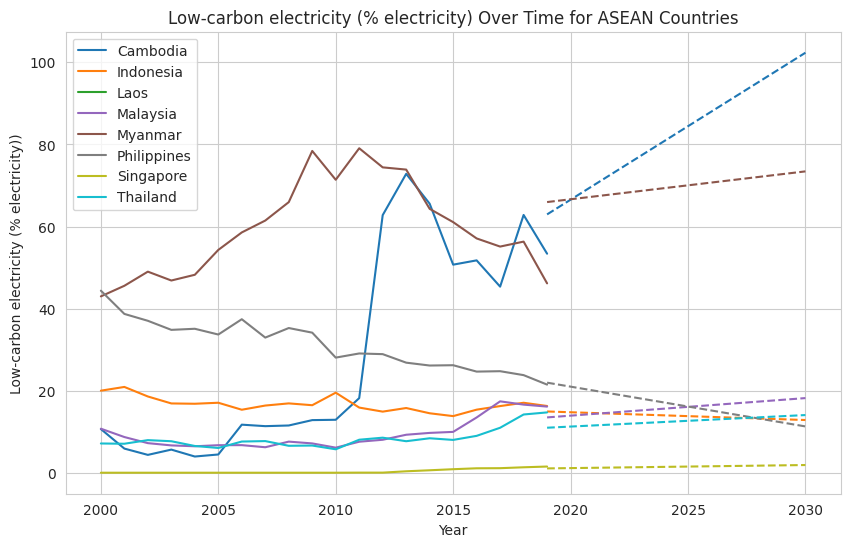

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your dataset (assuming it has columns like 'Entity', 'Year', and 'gdp_growth')

# List of countries to include
countries_to_include = [ 'Cambodia', 'Indonesia', 'Laos', 'Malaysia','Myanmar', 'Philippines', 'Singapore', 'Thailand']

# Create an empty DataFrame to store predicted data
predicted_data = pd.DataFrame(columns=['Entity', 'Year', 'Predicted Growth'])

# Create a linear regression model
model = LinearRegression()

# Iterate through the list of countries
for country in countries_to_include:
    # Filter the data for the current country
    country_data = data[(data['Entity'] == country) & (data['Year'] <= 2019)]

    if not country_data.empty:
        # Prepare data for training
        X_train = country_data[['Year']]
        y_train = country_data['Low-carbon electricity (% electricity)']

        # Train the model
        model.fit(X_train, y_train)

        # Predict GDP growth for future years (2020+)
        years_to_predict = [2019, 2020, 2021, 2022, 2023, 2024, 2025,2026,2027,2028,2029,2030]  # Add more years as needed
        X_future = pd.DataFrame({'Year': years_to_predict})
        predicted_growth = model.predict(X_future)

        # Create a DataFrame for the current country's predicted data
        predicted_country_data = pd.DataFrame({'Entity': [country] * len(years_to_predict),
                                               'Year': years_to_predict,
                                               'Predicted Growth': predicted_growth})

        # Append the predicted data to the overall DataFrame
        predicted_data = predicted_data.append(predicted_country_data, ignore_index=True)

# Visualize the predicted GDP growth for the selected countries
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(countries_to_include))

for idx, country in enumerate(countries_to_include):
    country_data = data[(data['Entity'] == country) & (data['Year'] <= 2019)]
    country_predicted_data = predicted_data[predicted_data['Entity'] == country]

    # Plot both historical and predicted data using the same color
    color = colors(idx)
    plt.plot(country_data['Year'], country_data['Low-carbon electricity (% electricity)'], label=f'{country}', linestyle='-', color=color)
    plt.plot(country_predicted_data['Year'], country_predicted_data['Predicted Growth'], linestyle='--', color=color)

plt.title('Low-carbon electricity (% electricity) Over Time for ASEAN Countries')
plt.xlabel('Year')
plt.ylabel('Low-carbon electricity (% electricity))')
plt.legend()
plt.grid(True)
plt.show()


